# Resume to text

In [1]:
#Installing required prerequisites

!pip install docx2txt
!pip install PyPDF2
!pip install textract
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr \
 flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig
!pip install -U nltk
!pip install wget
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!pip install matplotlib
!pip install pandas
!pip install wordcloud

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import docx2txt
import PyPDF2 
import os


In [3]:
#Path where saved resumes are located

projectDir = '/Users/ALU STUDENT/Downloads/ResumeGrading/'
resumeDir = projectDir + 'ML_Resumes/'
jdDir = projectDir + 'JD/'

In [4]:
#Extracting information from pdf

from pdfminer3.layout import LAParams, LTTextBox
from pdfminer3.pdfpage import PDFPage
from pdfminer3.pdfinterp import PDFResourceManager
from pdfminer3.pdfinterp import PDFPageInterpreter
from pdfminer3.converter import PDFPageAggregator
from pdfminer3.converter import TextConverter
import io

def convert_pdf_to_txt(path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle, laparams=LAParams())
    page_interpreter = PDFPageInterpreter(resource_manager, converter)

    with open(path, 'rb') as fh:

        for page in PDFPage.get_pages(fh,
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)

        text = fake_file_handle.getvalue()

# close 
    converter.close()
    fake_file_handle.close()

    return text

In [5]:
#Open .doc files or .pdf files

resumeTxt = []
for filename in os.listdir(resumeDir):
    if(filename.endswith(".pdf")):
        try:
            resumeTxt.append(convert_pdf_to_txt(resumeDir+filename))
        except Exception:
            print('Error reading .pdf file' + filename)
    if(filename.endswith(".docx")):
        try:
            doc = docx.Document(resumeDir + filename)
            data = ""
            fullText = []
            for para in doc.paragraphs:
                fullText.append(para.text)
                data = '\n'.join(fullText)
            resumeTxt.append(data)
        except IOError:
            print('Error reading .docx file' + filename)
    if(filename.endswith(".doc")):
        try:
            text = textract.process(resumeDir+filename).decode('utf-8')     
            resumeTxt.append(text)
        except Exception:
            print('Error reading .doc file :' + filename)

In [6]:
len(resumeTxt)


71

In [7]:
print(resumeTxt[0])


NADIA UWASE 

Rwandan | KK 579 St N04, Kigali, Rwanda | +250784650126 

nuwase17@alustudent.com | LinkedIn: ​Nadia Uwase​ | Skype ID: Nadia Uwase 

 

 

 

 

   

 
SUMMARY 
 
Enthusiastic, Motivated, detail-oriented. I have experience in market research and analysis. Currently pursuing a degree in computer
 
science.
 
EDUCATIONAL BACKGROUND 
African Leadership University – ​Kigali, Rwanda
B.S Computer Science 
Relevant Coursework: Python Programming, Data Structures and Algorithms, Software engineering, Cloud computing, Artificial
 
 
Intelligence, Leadership Core. 
Wellspring Academy – ​Kigali, Rwanda
Cambridge International General Certificate of Education  
Relevant Coursework: Mathematics, Physics, Chemistry, English, French.  

September 2017 – June 2021 

January 2015 – June 2017 

   

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

PROFESSIONAL WORK EXPERIENCE 
Operations Intern
Hope for Families, Ltd – ​Kigali, Rwanda
● Carried out an in-depth study of the business t

In [8]:
jdTxt = []
for filename in os.listdir(jdDir):
    if(filename.endswith(".pdf")):
        try:
            jdTxt.append(convert_pdf_to_txt(jdDir+filename))
        except Exception:
            print('Error reading .pdf file' + filename)

In [9]:
len(jdTxt)

1

In [10]:
print(jdTxt[0])


Internship Description 

The company seeks an intern with experience in software design, coding and 
debugging. The intern will gain exciting real-world software engineering experience at a 
thriving company. 

We frequently work in small teams to solve problems, explore new technologies, and 
learn from one another. The ideal intern for this environment will be enthusiastic and 
collaborative. 

Responsibilities 

● Document and test new software applications 
● Assess new application ideas 
● Research competitor offerings 
● Develop applications (coding, programming) 
● Interview beta testers 

Requirements 

● Computer Science/Network Engineering, Engineering, or Mathematics major 
● Excellent analytical and mathematics skills 
● Ability to work in teams 
● Experience programming in C, C++, or Java 
● Data analysis skills 
● Machine learning and building algorithms 
 

Benefits 

● Practical experience with a wide variety of software engineering tasks 
● Collaborating hand-in-hand w

# Cleaning the datasets

In [11]:
import nltk

In [12]:
#Downloading stop words

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ALU
[nltk_data]     STUDENT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:

from nltk.corpus import stopwords
sw = set(stopwords.words('english'))

In [14]:
import re
import string 

In [15]:
resumeTxtNoStopword = []

for resume in resumeTxt:
    text = resume
    text = text.split()
    re_punc = re.compile( ' [%s] ' % re.escape(string.punctuation))
    text = [re_punc.sub( '' , w) for w in text]
    text = [word for word in text if word.isalpha()]
    text = [word for word in text if len(word) > 1]

    useful_words = [w for w in text if w not in sw]
  
    resumeTxtNoStopword.append(" ".join(useful_words))
    
    

In [16]:
len(resumeTxtNoStopword)


71

In [17]:
# obtains tokens with at least 1 alphabet
    
import re
def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [18]:
i = 0
tokenized_resumes = []
for resume in resumeTxtNoStopword:
    r = tokenize(resume)
    tokenized_resumes.append(r)
    i += 1

In [19]:
print(tokenized_resumes[:3])


[['nadia', 'uwase', 'rwandan', 'kk', 'st', 'rwanda', 'skype', 'nadia', 'uwase', 'summary', 'experience', 'market', 'research', 'currently', 'pursuing', 'degree', 'computer', 'educational', 'background', 'african', 'leadership', 'university', 'rwanda', 'computer', 'science', 'relevant', 'python', 'data', 'structures', 'software', 'cloud', 'artificial', 'leadership', 'wellspring', 'academy', 'rwanda', 'cambridge', 'international', 'general', 'certificate', 'education', 'relevant', 'september', 'june', 'january', 'june', 'professional', 'work', 'experience', 'operations', 'intern', 'hope', 'ltd', 'rwanda', 'carried', 'study', 'business', 'evaluation', 'existing', 'market', 'research', 'may', 'september', 'used', 'design', 'new', 'business', 'model', 'marketing', 'officer', 'engineering', 'hub', 'rwanda', 'conducted', 'market', 'research', 'developed', 'marketing', 'strategy', 'one', 'products', 'school', 'may', 'september', 'management', 'pitched', 'product', 'several', 'potential', 'clie

In [20]:
txt_file = projectDir + 'Clean_ML_Resumes/'
txt_file2 = projectDir + 'Clean_ML_JD/'



In [21]:
jdTxtNoStopword = []

for jd in jdTxt:
    text = jd
    text = text.split()
    re_punc = re.compile( ' [%s] ' % re.escape(string.punctuation))
    text = [re_punc.sub( '' , w) for w in text]
    text = [word for word in text if word.isalpha()]
    text = [word for word in text if len(word) > 1]

    useful_words = [w for w in text if w not in sw]
  
    jdTxtNoStopword.append(" ".join(useful_words))

In [22]:
i = 0
tokenized_jd = []
for jd in jdTxtNoStopword:
    r = tokenize(jd)
    tokenized_jd.append(r)
    i += 1


In [23]:
print(tokenized_jd[:1])


[['internship', 'description', 'the', 'company', 'seeks', 'intern', 'experience', 'software', 'coding', 'the', 'intern', 'gain', 'exciting', 'software', 'engineering', 'experience', 'thriving', 'we', 'frequently', 'work', 'small', 'teams', 'solve', 'explore', 'new', 'learn', 'one', 'the', 'ideal', 'intern', 'environment', 'enthusiastic', 'responsibilities', 'document', 'test', 'new', 'software', 'applications', 'assess', 'new', 'application', 'ideas', 'research', 'competitor', 'offerings', 'develop', 'applications', 'interview', 'beta', 'testers', 'requirements', 'computer', 'mathematics', 'major', 'excellent', 'analytical', 'mathematics', 'skills', 'ability', 'work', 'teams', 'experience', 'programming', 'java', 'data', 'analysis', 'skills', 'machine', 'learning', 'building', 'algorithms', 'benefits', 'practical', 'experience', 'wide', 'variety', 'software', 'engineering', 'tasks', 'collaborating', 'skilled', 'teams', 'software', 'engineers', 'training', 'opportunities', 'seasoned', '

In [24]:
i = 0
for resume in tokenized_resumes:
    tok_resume = ''
    for tok in resume:
        tok_resume = tok_resume + tok + ' '
    file = open(txt_file + str(i), 'w+', encoding='utf-8')
    file.writelines(tok_resume)
    file.close()
    i += 1

In [25]:
i = 0
for jd in tokenized_jd:
    tok_jd = ''
    for tok in jd:
        tok_jd = tok_jd + tok + ' '
    file = open(txt_file2 + str(i), 'w+', encoding='utf-8')
    file.writelines(tok_jd)
    file.close()
    i += 1

In [26]:
cleanResumeDir = projectDir + 'Clean_ML_Resumes/'

os.chdir(cleanResumeDir)

tokenized_resumes = []

for clean_resume in os.listdir(cleanResumeDir):
    file = open(str(clean_resume), 'r', encoding='utf-8')
    resume = file.read()
    tokenized_resumes.append(resume.split())

In [27]:
cleanJdDir = projectDir + 'Clean_ML_JD/'

os.chdir(cleanJdDir)

tokenized_jd = []

for clean_jd in os.listdir(cleanJdDir):
    file = open(str(clean_jd), 'r', encoding='utf-8')
    jd = file.read()
    tokenized_jd.append(jd.split())

In [28]:
print(tokenized_resumes[:1])


[['nadia', 'uwase', 'rwandan', 'kk', 'st', 'rwanda', 'skype', 'nadia', 'uwase', 'summary', 'experience', 'market', 'research', 'currently', 'pursuing', 'degree', 'computer', 'educational', 'background', 'african', 'leadership', 'university', 'rwanda', 'computer', 'science', 'relevant', 'python', 'data', 'structures', 'software', 'cloud', 'artificial', 'leadership', 'wellspring', 'academy', 'rwanda', 'cambridge', 'international', 'general', 'certificate', 'education', 'relevant', 'september', 'june', 'january', 'june', 'professional', 'work', 'experience', 'operations', 'intern', 'hope', 'ltd', 'rwanda', 'carried', 'study', 'business', 'evaluation', 'existing', 'market', 'research', 'may', 'september', 'used', 'design', 'new', 'business', 'model', 'marketing', 'officer', 'engineering', 'hub', 'rwanda', 'conducted', 'market', 'research', 'developed', 'marketing', 'strategy', 'one', 'products', 'school', 'may', 'september', 'management', 'pitched', 'product', 'several', 'potential', 'clie

In [29]:
print(tokenized_jd[:1])


[['internship', 'description', 'the', 'company', 'seeks', 'intern', 'experience', 'software', 'coding', 'the', 'intern', 'gain', 'exciting', 'software', 'engineering', 'experience', 'thriving', 'we', 'frequently', 'work', 'small', 'teams', 'solve', 'explore', 'new', 'learn', 'one', 'the', 'ideal', 'intern', 'environment', 'enthusiastic', 'responsibilities', 'document', 'test', 'new', 'software', 'applications', 'assess', 'new', 'application', 'ideas', 'research', 'competitor', 'offerings', 'develop', 'applications', 'interview', 'beta', 'testers', 'requirements', 'computer', 'mathematics', 'major', 'excellent', 'analytical', 'mathematics', 'skills', 'ability', 'work', 'teams', 'experience', 'programming', 'java', 'data', 'analysis', 'skills', 'machine', 'learning', 'building', 'algorithms', 'benefits', 'practical', 'experience', 'wide', 'variety', 'software', 'engineering', 'tasks', 'collaborating', 'skilled', 'teams', 'software', 'engineers', 'training', 'opportunities', 'seasoned', '

In [30]:
#For word embeddings
!pip3 install -U gensim


# Using a pretrained google word2vec Model
#This model contains 3 million words and phrases and was fit using 300-dimensional word vectors

In [31]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import multiprocessing

In [32]:
#Word vectors

modelDir = projectDir + 'models/'
os.chdir(modelDir)

model = gensim.models.Word2Vec(tokenized_resumes, size=300, window=12, min_count=5, negative=15, 
               iter=15, workers=multiprocessing.cpu_count())



In [33]:
#For vector representation of words
model.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz', lockf=1.0, binary=True)

model.train(sentences = tokenized_resumes, total_examples=model.corpus_count, epochs = 10)

(153789, 231800)

# Model Evaluation

In [34]:
#Checking number of words in our model
len(model.wv.vocab)


1046

In [35]:
#Checking if the word data is in our vocab
'data' in model.wv.vocab

True

In [36]:
#List of all words in the vocabulary
words = sorted(model.wv.vocab.keys())


In [37]:
print("Number of words:", len(words))


Number of words: 1046


In [38]:
# Save words to file: words.txt
fp = open("words.txt", "w", encoding="utf-8")
for word in words:
    fp.write(word + '\n')
fp.close()

In [39]:
# print all words in the vocab
print (words[0:1046]) 


['ability', 'able', 'academic', 'academy', 'access', 'accordance', 'account', 'accountancy', 'accountant', 'accountants', 'accounting', 'accounts', 'accuracy', 'achieve', 'achieved', 'achievements', 'acquisition', 'across', 'act', 'acted', 'actively', 'activities', 'additional', 'address', 'adequacy', 'administration', 'administrative', 'admission', 'advanced', 'advised', 'adviser', 'advising', 'advisors', 'advisory', 'africa', 'african', 'agreement', 'aim', 'algorithms', 'allocation', 'also', 'alu', 'ambassador', 'amongst', 'analyse', 'analysis', 'analyst', 'analytical', 'analytics', 'analyze', 'analyzed', 'and', 'android', 'ann', 'annual', 'app', 'applicable', 'application', 'applications', 'applied', 'approach', 'appropriate', 'apr', 'april', 'areas', 'armed', 'around', 'arrange', 'arrangement', 'arrangements', 'arts', 'as', 'asean', 'asia', 'assess', 'assessed', 'assessing', 'assessment', 'assessments', 'asset', 'assets', 'assignments', 'assist', 'assistant', 'assisted', 'associate

# Checking accuracy

A way to check accuracy of this model is to check if it reports high level of similarity between two semantically equivalent words 

NB: Our text corpus is quite small, (only 1046 words) thus our vector space is not expected to be fully adequate.

In [40]:
#High similarity
model.similarity('data', 'computer')

<ipython-input-40-fb33066910fd>:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  model.similarity('data', 'computer')


0.7648469

In [41]:
# low similarity
model.similarity('data', 'business')  


<ipython-input-41-f9aeca69f278>:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  model.similarity('data', 'business')


0.090145275

In [42]:
model.similarity('work', 'experience')

<ipython-input-42-02430a80d572>:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  model.similarity('work', 'experience')


0.6811207

In [43]:
# The word 'school' comes out 2nd as the most similar
model.most_similar(positive=['student', 'university'], negative=['professional'], topn=6)


<ipython-input-43-e4c8630be198>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(positive=['student', 'university'], negative=['professional'], topn=6)


[('students', 0.8032665252685547),
 ('school', 0.778995156288147),
 ('campus', 0.737342119216919),
 ('faculty', 0.7273327112197876),
 ('college', 0.6444117426872253),
 ('semester', 0.6398674249649048)]

In [44]:
#Depending on types of resumes, I selected what I thought was closet to my dataset category

wordV = model.wv
result = wordV .similar_by_word("global")
print("Words similar to 'global' : \n", result[:5])

result = wordV .similar_by_word("business")
print("Words similar to 'business' : \n", result[:5])

result = wordV .similar_by_word("data")
print("Words similar to 'data' : \n", result[:5])

result = wordV .similar_by_word("international")
print("Words similar to 'international' : \n", result[:5])

result = wordV .similar_by_word("project")
print("Words similar to 'project' : \n", result[:5])

result = wordV .similar_by_word("computer")
print("Words similar to 'computer' : \n", result[:5])

Words similar to 'global' : 
 [('world', 0.6304385662078857), ('international', 0.6131970286369324), ('major', 0.6105051040649414), ('largest', 0.5753308534622192), ('strategic', 0.5389127731323242)]
Words similar to 'business' : 
 [('finance', 0.6735454797744751), ('nanyang', 0.6480202674865723), ('major', 0.6379085779190063), ('administration', 0.6326745748519897), ('bba', 0.6031268835067749)]
Words similar to 'data' : 
 [('software', 0.7892192006111145), ('using', 0.7655935287475586), ('computer', 0.7648468017578125), ('database', 0.7598581910133362), ('rwanda', 0.7396263480186462)]
Words similar to 'international' : 
 [('major', 0.6334071755409241), ('conference', 0.6195428967475891), ('global', 0.6131970286369324), ('exchange', 0.579788327217102), ('deloitte', 0.569871187210083)]
Words similar to 'project' : 
 [('projects', 0.6416042447090149), ('development', 0.6103978157043457), ('building', 0.5266015529632568), ('community', 0.5047963857650757), ('marketing', 0.5012331604957581

# Accessing the vectors

In [45]:
# vector size
print(model['science'].size)  

300


<ipython-input-45-992696666065>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['science'].size)


In [46]:
print(model['science'])


<ipython-input-46-09360230183f>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['science'])


[-1.01043046e+00 -5.68890691e-01  6.30216002e-01  5.34983754e-01
  1.90541774e-01  3.80987942e-01  5.08408964e-01 -3.85448575e-01
 -1.12462234e+00 -1.06641197e+00  7.98305094e-01  6.28395557e-01
 -3.61890048e-01  3.52210522e-01 -1.11597872e+00 -2.73521364e-01
 -7.07869887e-01 -4.43754673e-01  2.65186936e-01 -4.22030687e-01
 -2.22817436e-01  2.68117160e-01 -2.05678165e-01  7.51720741e-02
 -5.27868792e-02  5.47848165e-01 -1.03484847e-01 -4.50444072e-01
 -2.56923556e-01  4.64494675e-01  4.05079238e-02 -6.21438384e-01
  4.70889956e-01  8.17618892e-02  5.77873766e-01 -3.84333104e-01
 -8.83807689e-02  5.85267961e-01 -2.25468174e-01 -4.35473889e-01
 -2.74248004e-01  2.33281795e-02  7.03312755e-01 -1.15024333e-03
  2.80549824e-01 -6.24701269e-02 -5.66312410e-02  4.71068352e-01
 -6.94243610e-01 -9.45639670e-01 -3.87489319e-01  7.59988949e-02
  1.02378404e+00  2.52510428e-01  5.22959232e-01  6.25919998e-01
 -1.06571019e-02 -2.79038817e-01 -4.32861716e-01 -2.13634223e-01
 -3.12326699e-01 -5.72092

In [47]:
#Checking resume at index 12
check = model.wv.syn0
print(check[12].shape)
check[12]

(300,)


<ipython-input-47-12a34a2dadc0>:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  check = model.wv.syn0


array([ 0.341519  , -0.13676798, -0.03360523, -0.27738604,  0.04851706,
        0.23419774, -0.50318426, -0.2728314 , -0.5947781 ,  0.20473947,
        0.14848292, -0.05901241, -0.53658473, -0.12751324,  0.48554805,
       -0.44688872,  0.54292804, -0.11328924,  0.419489  ,  0.09447345,
       -0.1774646 , -0.6504123 ,  0.73546827,  0.11011522, -0.2933501 ,
       -0.03558768,  0.14975823,  0.2580221 ,  0.32766342, -0.74187934,
       -0.1951738 , -0.36310333,  0.2531522 , -0.05269331,  0.3950231 ,
       -0.05249243, -0.2719073 ,  0.23738323, -0.22073814, -0.15246314,
       -0.85066164,  0.0408638 , -0.59396267, -0.49381512,  0.40201813,
       -0.13439082,  0.09288717, -0.646783  ,  0.6451492 , -0.17521976,
       -0.0148949 ,  0.96896625,  0.32331553,  0.82702553, -0.25490296,
        0.39012784, -0.13223904, -0.13638134,  0.06133262, -0.17586237,
        0.17508544,  0.22997354, -0.15836425,  0.34666806, -0.30054086,
       -0.5345875 , -0.34439597,  0.07804168,  0.03940328,  0.05

In [143]:
#Saving model
modelDir = projectDir + 'models/'
os.chdir(modelDir)
model.init_sims(replace=True)
model_name = "resume_grading_model"
model.save(model_name)


In [144]:
model

# Clustering

In [50]:
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;
import pandas as pd;
import numpy as np;

def clustering_wordvecs(word_vectors, num_clusters):

    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [51]:
num_clusters = 5
centers, clusters = clustering_wordvecs(check, num_clusters)
centroid_map = dict(zip(model.wv.index2word, clusters))

In [52]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i+1).zfill(2)] = [index2word[j] for j in closest_words_idxs[i][0]]
    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df;

In [53]:
top_words = get_top_words(model.wv.index2word, 100, centers, check);

In [54]:
top_words

,Cluster #01,Cluster #02,Cluster #03,Cluster #04,Cluster #05
1,aug,mapletree,mpf,kigali,ngee
2,feb,company,ensure,also,gce
3,apr,dcf,ifrs,help,hkicpa
4,uk,pte,procedures,it,smu
5,kuala,analyse,analyse,modelling,honours
...,...,...,...,...,...
96,top,deals,in,deliver,three
97,mar,connected,making,excel,event
98,promoted,range,engagements,leadership,open
99,works,regarding,teams,written,final


In [55]:
def display_cloud(cluster_num, cmap,):
    wc = WordCloud(background_color="black", max_words=100, max_font_size=80, colormap=cmap, width=800, height=400);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(2)]]))
    
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(i+1), bbox_inches='tight')

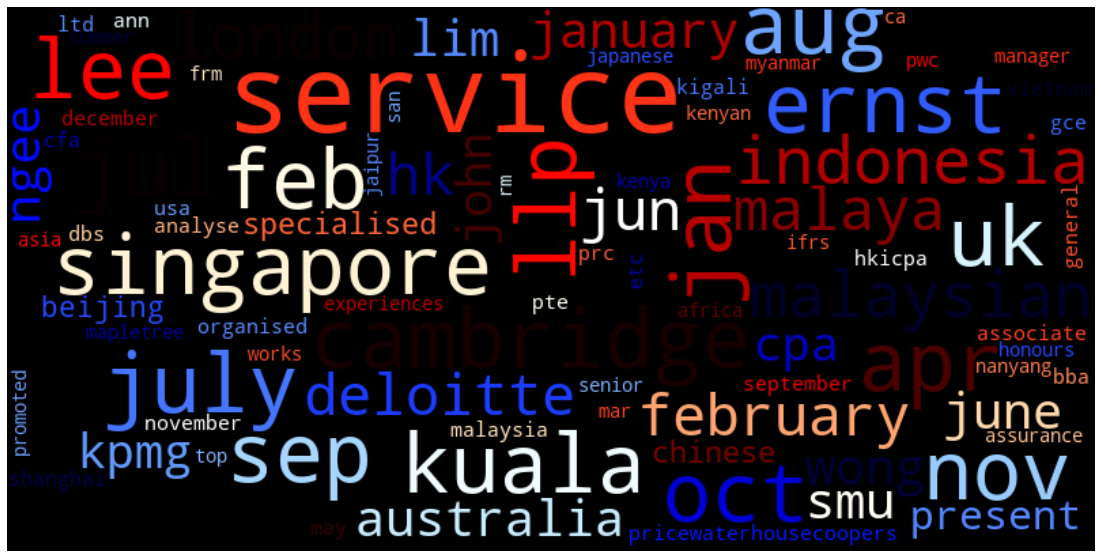

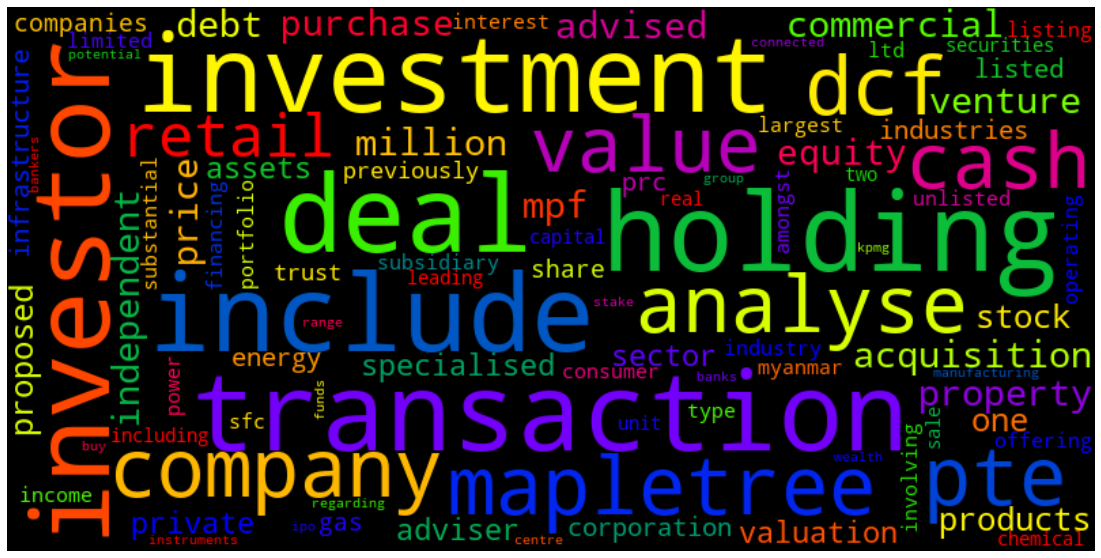

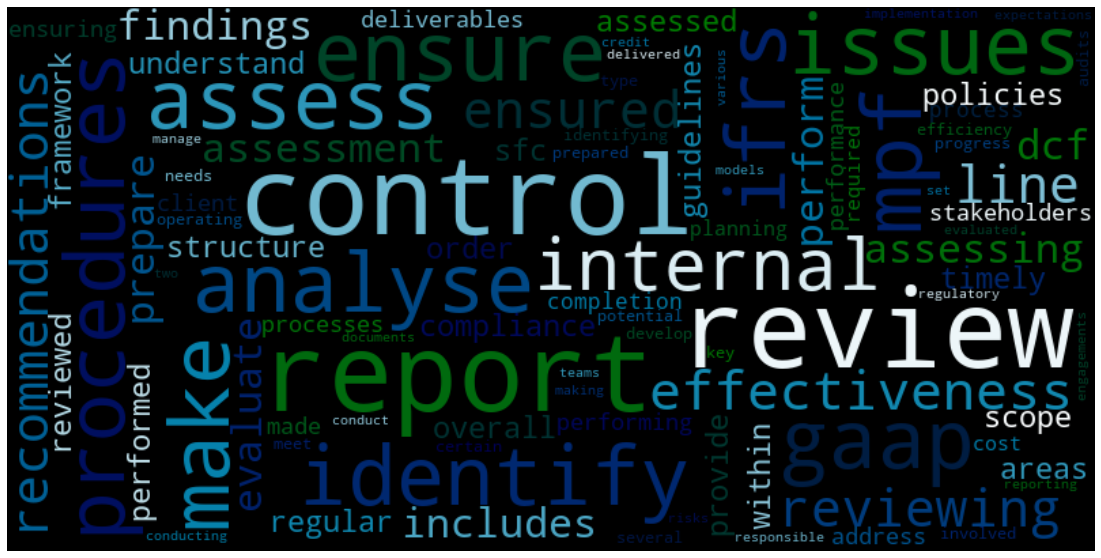

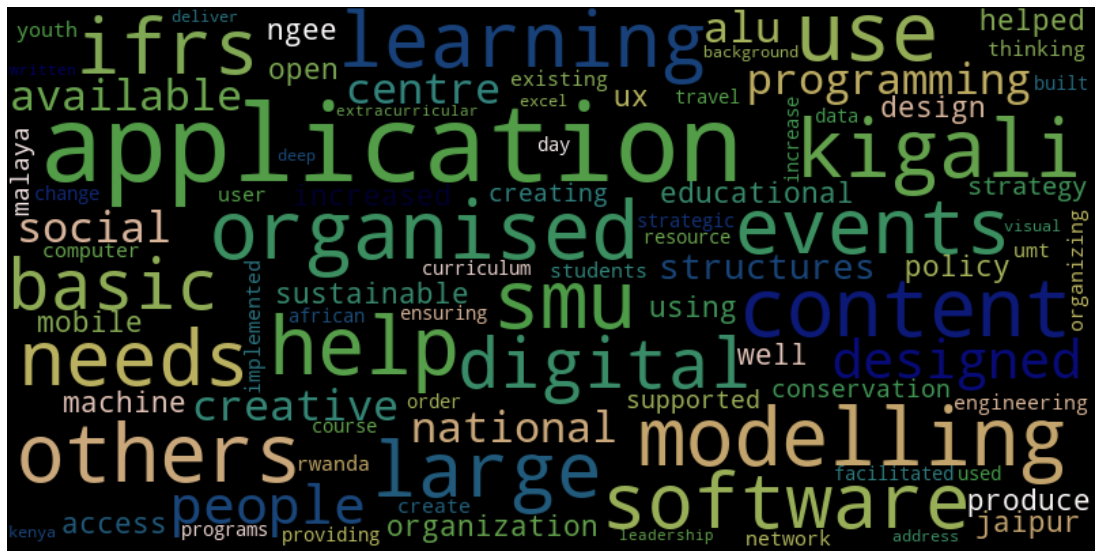

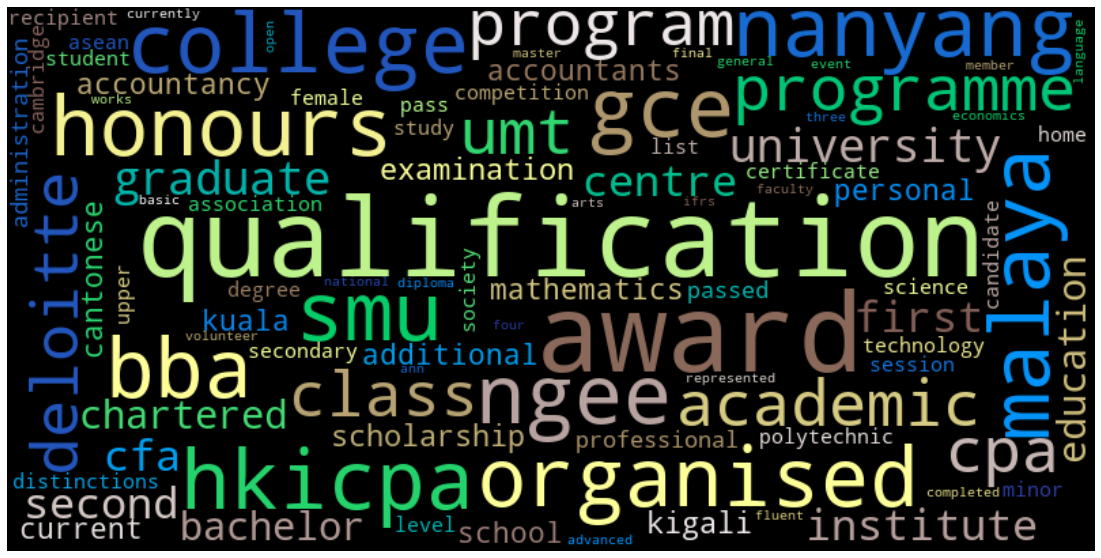

In [56]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from itertools import cycle

outputDir = projectDir + 'output/clusters/'
os.chdir(outputDir)

cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(5):
    col = next(cmaps)
    display_cloud(i+1, col)

In [57]:
print(tokenized_resumes[:3])

[['nadia', 'uwase', 'rwandan', 'kk', 'st', 'rwanda', 'skype', 'nadia', 'uwase', 'summary', 'experience', 'market', 'research', 'currently', 'pursuing', 'degree', 'computer', 'educational', 'background', 'african', 'leadership', 'university', 'rwanda', 'computer', 'science', 'relevant', 'python', 'data', 'structures', 'software', 'cloud', 'artificial', 'leadership', 'wellspring', 'academy', 'rwanda', 'cambridge', 'international', 'general', 'certificate', 'education', 'relevant', 'september', 'june', 'january', 'june', 'professional', 'work', 'experience', 'operations', 'intern', 'hope', 'ltd', 'rwanda', 'carried', 'study', 'business', 'evaluation', 'existing', 'market', 'research', 'may', 'september', 'used', 'design', 'new', 'business', 'model', 'marketing', 'officer', 'engineering', 'hub', 'rwanda', 'conducted', 'market', 'research', 'developed', 'marketing', 'strategy', 'one', 'products', 'school', 'may', 'september', 'management', 'pitched', 'product', 'several', 'potential', 'clie

In [58]:
job_description = jdTxt[0]
resume = resumeTxt[0]

In [59]:
text = [resume, job_description]


In [60]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(text)

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

# Print similarity scores
print("\nSimlarity Scores:")
print(cosine_similarity(count_matrix))


Simlarity Scores:
[[1.         0.48191815]
 [0.48191815 1.        ]]


In [62]:
# Get match percentage
matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
matchPercentage = round(matchPercentage)
print("Your resume matches about " + str(matchPercentage) + "% of the job description.")

Your resume matches about 48.0% of the job description.


In [63]:
!pip install Flask


In [64]:
!pip install python3-flask

ERROR: Could not find a version that satisfies the requirement python3-flask
ERROR: No matching distribution found for python3-flask


In [181]:
def get_closest(word, n):
    '''Get n most similar words by words.'''
    #This function can easily be expanded to get similar words to phrases--
    #using sent2vec() method defined in WithWord2Vec notebook. 
    word = word.lower()
    words = [word]
    similar_vals = [1]
    try:
        similar_list = model.most_similar(positive=[word],topn=n)
        
        for tupl in similar_list:
            words.append(tupl[0])
            similar_vals.append(tupl[1])
    except:
        #If word not in vocabulary return same word and 1 similarity-- 
        #see initialisation of words, similarities.
        pass
    
    return words, similar_vals

# Deployment

In [ ]:
import pandas as pd

In [67]:
!pip install -U pip setuptools wheel --user

In [68]:
!pip install -U spacy

In [69]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [145]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [146]:
import PyPDF2
import os
import collections
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

In [170]:
mypath=r'C:\Users\ALU STUDENT\Downloads\ResumeGrading\ML_Resumes'
#Path for the files
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [171]:
import glob

In [172]:
import collections
def pdfextract(file):
    pdf_file = open(file, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    for i in c:
        #page
        page = read_pdf.getPage(i)
        page_content = page.extractText()
    return (page_content.encode('utf-8'))

In [173]:
sim_words=[k[0] for k in model.wv.most_similar("computer")]


In [174]:
def create_bigram(words):
    common_terms = ["of", "with", "without", "and", "or", "the", "a"]
    x=words.split()
# Create the relevant phrases from the list of sentences:
    phrases = Phrases(x, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
    bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences is simply
    all_sentences = list(bigram[x])

# Customizing key-words to be extracted

In [175]:
def create_profile(file):
    model=Word2Vec.load("resume_grading_model")
    text = str(pdfextract(file))
    text = text.replace("\\n", "")
    text = text.lower()

    #customized key words 
    computer = [nlp(text[0]) for text in model.wv.most_similar("computer")]
    database = [nlp(text[0]) for text in model.wv.most_similar("database")]
    software = [nlp(text[0]) for text in model.wv.most_similar("software")]
    system = [nlp(text[0]) for text in model.wv.most_similar("system")]
    science = [nlp(text[0]) for text in model.wv.most_similar("science")]
    data = [nlp(text[0]) for text in model.wv.most_similar("data")]
    print("*******************************************")

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('computer', None, *computer)
    matcher.add('database', None, *database)
    matcher.add('software', None, *software)
    matcher.add('system', None, *system)
    matcher.add('science', None, *science)
    matcher.add('data', None, *data)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  
        span = doc[start : end]               
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    print("KEYWORDS")
    print(keywords)
    
# convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    print("********************DF********************")
    print(df)
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
    
       
    name = filename.split('_')
    print(name)
    name2 = name[0]
    name2 = name2.lower()

    # converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)
    print("******************DATAF**************")
    print(dataf)

    return(dataf)

# Execution

In [176]:
final_db=pd.DataFrame()
i=0
while i < len(onlyfiles):
    file=onlyfiles[i]
    dat=create_profile(file)

    final_db=final_db.append(dat)
    i+=1


*******************************************
KEYWORDS

********************DF********************
Empty DataFrame
Columns: [Keywords_List]
Index: []
['2020', 'Rwanda', 'CS', 'NadiaUwase', 'ALUResume']
******************DATAF**************
   Candidate Name Subject Keyword Count
0            2020     NaN     NaN   NaN
*******************************************
KEYWORDS
data using (4)
software using (4)
database using (4)
software application (1)
data machine (3)
software machine (3)
computer machine (3)
database machine (3)
system machine (3)
data learning (4)
software learning (4)
database learning (4)
science and (3)
computer and (3)
science of (2)
data programming (1)
software programming (1)
computer programming (1)
database programming (1)
data database (2)
system systems (3)
software data (6)
computer data (6)
database data (6)
computer science (3)
data computer (2)
software computer (2)
database computer (2)
science computer (2)
data structures (1)
database structures (1)
databas

*******************************************
KEYWORDS

********************DF********************
Empty DataFrame
Columns: [Keywords_List]
Index: []
['PWC', 'Olivia Peter', 'Regulatory Manager']
******************DATAF**************
  Candidate Name Subject Keyword Count
0            pwc     NaN     NaN   NaN
*******************************************
KEYWORDS
science of (26)
science and (41)
computer and (41)
system monitoring (1)
data structures (1)
database structures (1)
system internal (3)
system procedures (2)
system process (1)
science university (6)
software data (1)
computer data (1)
database data (1)
science honours (1)
computer cantonese (1)
data computer (1)
software computer (1)
database computer (1)
science computer (1)
********************DF********************
              Keywords_List
0           science of (26)
1          science and (41)
2         computer and (41)
3     system monitoring (1)
4       data structures (1)
5   database structures (1)
6       system in

*******************************************
KEYWORDS

********************DF********************
Empty DataFrame
Columns: [Keywords_List]
Index: []
['PWC', 'Qian Bowen', 'SM']
******************DATAF**************
  Candidate Name Subject Keyword Count
0            pwc     NaN     NaN   NaN
*******************************************
KEYWORDS
science and (11)
computer and (11)
science of (14)
science university (3)
data learning (2)
software learning (2)
database learning (2)
data using (1)
software using (1)
database using (1)
data computer (1)
software computer (1)
database computer (1)
science computer (1)
********************DF********************
             Keywords_List
0         science and (11)
1        computer and (11)
2          science of (14)
3   science university (3)
4        data learning (2)
5    software learning (2)
6    database learning (2)
7           data using (1)
8       software using (1)
9       database using (1)
10       data computer (1)
11   software co

*******************************************
KEYWORDS

********************DF********************
Empty DataFrame
Columns: [Keywords_List]
Index: []
['PWC', 'Vicky Lu', 'Audit Mgr']
******************DATAF**************
  Candidate Name Subject Keyword Count
0            pwc     NaN     NaN   NaN
*******************************************
KEYWORDS
science and (7)
computer and (7)
system internal (1)
system controls (1)
science of (2)
science university (1)
system process (1)
********************DF********************
            Keywords_List
0         science and (7)
1        computer and (7)
2     system internal (1)
3     system controls (1)
4          science of (2)
5  science university (1)
6      system process (1)
['PWC', 'Wong Jian Xiang', 'Manager']
******************DATAF**************
  Candidate Name   Subject      Keyword Count
0            pwc   science         and      7
1            pwc  computer         and      7
2            pwc    system    internal      1
3        

*******************************************
KEYWORDS
science of (4)
science university (2)
science and (1)
computer and (1)
********************DF********************
            Keywords_List
0          science of (4)
1  science university (2)
2         science and (1)
3        computer and (1)
['Pyramids Capital', 'Hussein Selim', 'Sales Director']
******************DATAF**************
     Candidate Name   Subject      Keyword Count
0  pyramids capital   science          of      4
1  pyramids capital   science  university      2
2  pyramids capital   science         and      1
3  pyramids capital  computer         and      1
*******************************************
KEYWORDS
science and (3)
computer and (3)
science university (1)
science of (2)
********************DF********************
            Keywords_List
0         science and (3)
1        computer and (3)
2  science university (1)
3          science of (2)
['Qiaowai', 'Dexter Dong', 'Proj Analyst']
******************DATAF*

IndexError: single positional indexer is out-of-bounds

In [177]:
#Code to count words under each category and visualize it through MAtplotlib
final_db2 = final_db['Keyword'].groupby([final_db['Candidate Name'], final_db['Subject']]).count().unstack()
final_db2.reset_index(inplace = True)
final_db2.fillna(0,inplace=True)
candidate_data = final_db2.iloc[:,1:]
candidate_data.index = final_db2['Candidate Name']
#the candidate profile in a csv format
cand=candidate_data.to_csv('candidate_profile.csv')
cand_profile=pd.read_csv('candidate_profile.csv')
cand_profile

,Candidate Name,computer,data,database,science,software,system
0,a2,6.0,7.0,8.0,5.0,8.0,2.0
1,cindy curriculumn vitae,1.0,0.0,0.0,3.0,0.0,0.0
2,pwc,65.0,24.0,28.0,105.0,25.0,47.0
3,pyramids capital,1.0,0.0,0.0,3.0,0.0,0.0
4,qiaowai,1.0,0.0,0.0,3.0,0.0,0.0
5,quality mgmt,1.0,0.0,0.0,5.0,0.0,0.0
6,quam capital,4.0,0.0,1.0,5.0,1.0,1.0
7,rabo equity,0.0,0.0,0.0,3.0,0.0,0.0
8,raffeisen,1.0,0.0,0.0,1.0,0.0,0.0
9,year4,6.0,4.0,4.0,5.0,4.0,2.0


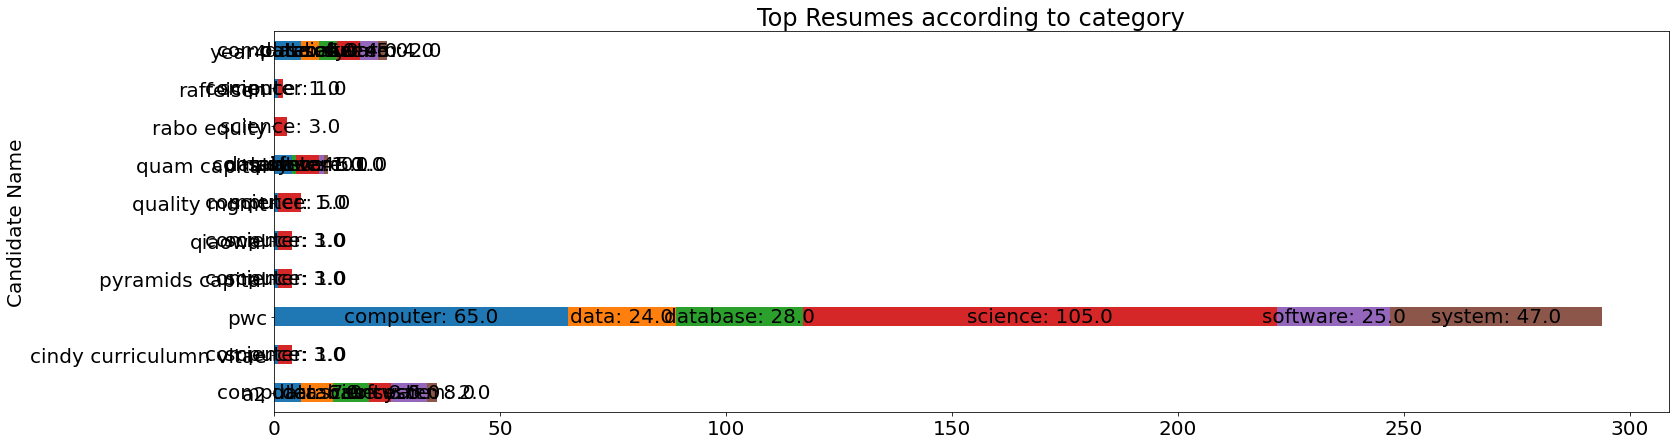

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20})
ax = candidate_data.plot.barh(title="Top Resumes according to category", legend=False, figsize=(25,7), stacked=True)
skills = []
for j in candidate_data.columns:
    for i in candidate_data.index:
        skill = str(j)+": " + str(candidate_data.loc[i][j])
        skills.append(skill)
patches = ax.patches
for skill, rect in zip(skills, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., skill, ha='center', va='center')
plt.show()